# 🧪 Parcial – Métodos Predictivos
Completa las celdas con `TODO` y ejecuta `Runtime → Run all` antes de entregar.

## 🎯 Instrucciones Generales
- Este parcial está dividido en dos partes: teoría (40 pts) y práctica (60 pts).
- Documenta claramente tu código y explica tus respuestas en celdas Markdown.
- Al finalizar, exporta el notebook a PDF y entrega también tus 5 slides con visualizaciones clave.


## <a id='parte-a'></a>📝 Parte A — Cuestionario Teórico (40 pts)
Responde **brevemente** en las celdas Markdown que siguen a cada pregunta.


#### 1️⃣ **Variable objetivo (y)** – Defínela y da un ejemplo en este dataset.

*Respuesta:* <!-- TODO -->


#### 2️⃣ Ordena las fases del *pipeline* de ML: `Modelado`, `Pre‑procesamiento`, `EDA`, `Evaluación`, `Insight de negocio`.

*Respuesta:* <!-- TODO -->


#### 3️⃣ Para un problema de **clases desbalanceadas**, ¿qué métrica priorizarías y por qué?

*Respuesta:* <!-- TODO -->


#### 4️⃣ Describe **overfitting** y cómo lo detectarías en la práctica.

*Respuesta:* <!-- TODO -->


#### 5️⃣ Completa: *K‑means es un algoritmo de _________ porque ________.*

*Respuesta:* <!-- TODO -->


#### 7️⃣ En **regresión**, ¿cómo es la variable objetivo? (cualitativa, cuantitativa, binaria…).

*Respuesta:* <!-- TODO -->


#### 8️⃣ Menciona 2 técnicas comunes de **pre‑procesamiento de texto**.

*Respuesta:* <!-- TODO -->


#### 9️⃣ ¿Qué representa el parámetro *k* en K‑means y qué ocurre si es muy grande?

*Respuesta:* <!-- TODO -->


#### 🔟 Define brevemente un **embedding** en NLP y su utilidad.

*Respuesta:* <!-- TODO -->


In [20]:
!wget https://github.com/javierherrera1996/IntroMachineLearning/raw/refs/heads/main/TercerCorte/amazon.csv.zip

--2025-06-05 03:00:46--  https://github.com/javierherrera1996/IntroMachineLearning/raw/refs/heads/main/TercerCorte/amazon.csv.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/IntroMachineLearning/refs/heads/main/TercerCorte/amazon.csv.zip [following]
--2025-06-05 03:00:47--  https://raw.githubusercontent.com/javierherrera1996/IntroMachineLearning/refs/heads/main/TercerCorte/amazon.csv.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2043633 (1.9M) [application/zip]
Saving to: ‘amazon.csv.zip.1’

amazon.csv.zip.1    100%[===================>]   1.95M  --.-KB/s    in 0.07s 

In [21]:
!unzip amazon.csv.zip

Archive:  amazon.csv.zip
replace amazon.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings, random
warnings.filterwarnings('ignore')
random.seed(42)
np.random.seed(42)

### 2. Carga de datos

In [23]:
# Reemplaza con la ruta correcta de tu archivo CSV si lo subes a Colab
df = pd.read_csv('amazon.csv')
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


### 3. Limpieza y Feature Engineering


*   Tome `review_content` para crear una columna text

*   Haga una limpieza de rating:
```
df['col'] = df['col'].str.replace(',', '.').str.strip()
df['col'] = df['col'].str.replace('|', '0').str.strip()
df['col'] = df['col'].astype(float)
```
*   Haga una limpieza de `discounted_price`


```
  df['col'] = df['col'].str.replace('.', '', regex=False).str.replace(',', '.', regex=False)
  df['col'] = df['col'].replace('₹', '', regex=True).astype(float)
```



*   Haga una limpieza de `actual_price`

```
df['col'] = df['col'].str.replace('.', '', regex=False).str.replace(',', '.', regex=False)
df['col'] = df['col'].replace('₹', '', regex=True)
df['col'] = df['col'].astype(float)
```


*   Cree la variable `positive` donde `ranting` se mayor a 4:
```
df['col1'] = df['col2'].apply(lambda x: 1 if x >= 4 else 0)
```

*   Con `discount_percentage` donde `ranting` se mayor a 4:
```
df['col'] = df['col'].replace('%', '', regex=True).astype(float)
```

In [24]:
from wordcloud import WordCloud

In [25]:
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
df['text'] = df['review_content']

In [27]:
# Explicitly convert the 'rating' column to string type before applying string operations
df['rating'] = df['rating'].astype(str)

# Now apply the string operations as intended
df['rating'] = df['rating'].str.replace(',', '.').str.strip()
df['rating'] = df['rating'].str.replace('|', '0').str.strip()
df['rating'] = df['rating'].astype(float)

In [28]:
# Explicitly convert the 'discounted_price' column to string type before applying string operations
df['discounted_price'] = df['discounted_price'].astype(str)

# Now apply the string operations as intended
df['discounted_price'] = df['discounted_price'].str.replace('.', '', regex=False).str.replace(',', '.', regex=False)
df['discounted_price'] = df['discounted_price'].replace('₹', '', regex=True).astype(float)

In [30]:
# Explicitly convert 'actual_price' to string before applying string methods
df['actual_price'] = df['actual_price'].astype(str)
df['actual_price'] = df['actual_price'].replace('₹', '', regex=True)
df['actual_price'] = df['actual_price'].str.replace('.', '', regex=False)
df['actual_price'] = df['actual_price'].str.replace(',', '.', regex=False)
# The line below was redundant as ₹ is already removed
# df['actual_price'] = df['actual_price'].replace('₹', '', regex=True)
df['actual_price'] = df['actual_price'].str.strip()
df['actual_price'] = df['actual_price'].astype(float)

In [31]:
df['positive'] = df['rating'].apply(lambda x: 1 if x >= 4 else 0)

In [32]:
df['discount_percentage'] = df['discount_percentage'].replace('%', '', regex=True).astype(float)

## 💻 Parte B – Práctica (60 pts)
### 1. Setup


## Realize dos WorldClouds uno con reviews positivos y otro con negativos y haga un grafico de barras comaparado por los 10 mas comunes.

In [33]:
def limpiar_texto(texto):
    texto = texto.lower()
    texto = re.sub(r'[^\w\s]', '', texto)
    palabras = texto.split()
    palabras = [palabra for palabra in palabras if palabra not in stop_words]
    return palabras

In [34]:
def contar_palabras(texto):
    palabras = limpiar_texto(texto)
    return Counter(palabras)

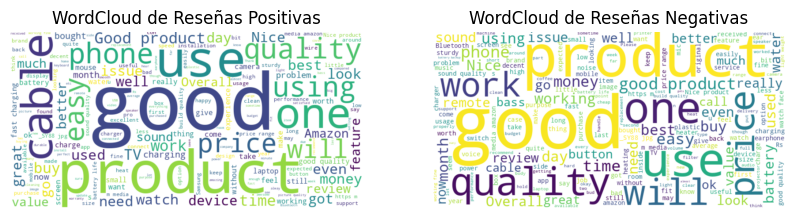

In [35]:
positive_reviews = df[df['positive'] == 1]['text'].dropna()
negative_reviews = df[df['positive'] == 0]['text'].dropna()
# Concatenar todo el texto de las reseñas positivas y negativas
positive_text = " ".join(positive_reviews)
negative_text = " ".join(negative_reviews)
# Generar WordCloud para reseñas positivas
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
# Generar WordCloud para reseñas negativas
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_text)
# Mostrar los WordClouds
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud de Reseñas Positivas')
plt.subplot(1, 2, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud de Reseñas Negativas')
plt.show()

In [36]:
# Contar palabras y obtener las 10 más comunes para cada grupo
positive_word_counts = contar_palabras(positive_text)
negative_word_counts = contar_palabras(negative_text)
top_10_positive = positive_word_counts.most_common(10)
top_10_negative = negative_word_counts.most_common(10)
# Preparar datos para el gráfico de barras
positive_words = [word for word, count in top_10_positive]
positive_counts = [count for word, count in top_10_positive]
negative_words = [word for word, count in top_10_negative]
negative_counts = [count for word, count in top_10_negative]

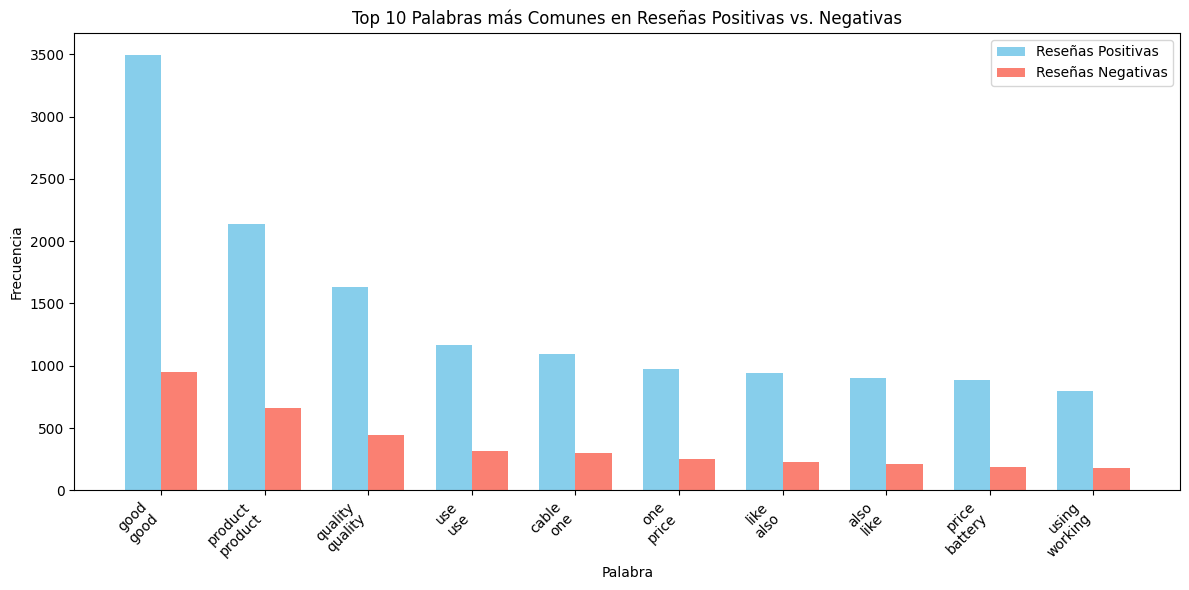

In [37]:
# Crear gráfico de barras comparado
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = np.arange(10)
plt.bar(index, positive_counts, bar_width, label='Reseñas Positivas', color='skyblue')
plt.bar(index + bar_width, negative_counts, bar_width, label='Reseñas Negativas', color='salmon')
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')
plt.title('Top 10 Palabras más Comunes en Reseñas Positivas vs. Negativas')
plt.xticks(index + bar_width / 2, [f'{p}\n{n}' for p, n in zip(positive_words, negative_words)], rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

### 4. Análisis Exploratorio de Datos (EDA)

### 5. Clasificación Supervisada – Regresión Logística (25 pts)


*   Haga una regresion logistica de postive vs text
*   Muestre los resultados en una matriz de confusion



              precision    recall  f1-score   support

           0       1.00      0.14      0.24        74
           1       0.77      1.00      0.87       219

    accuracy                           0.78       293
   macro avg       0.89      0.57      0.56       293
weighted avg       0.83      0.78      0.71       293



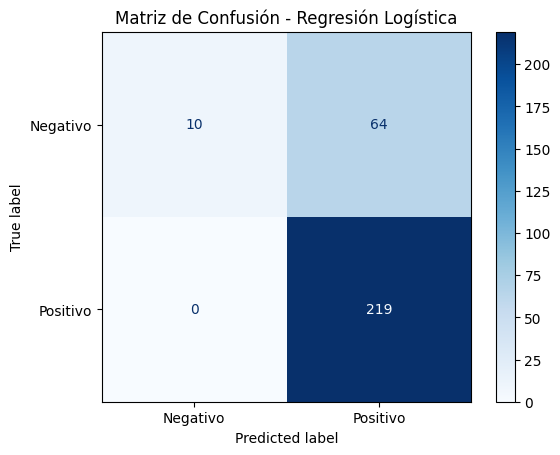

In [38]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['positive'], test_size=0.2, random_state=42)

# Creación de un pipeline con TfidfVectorizer y Logistic Regression
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('logistic', LogisticRegression())
])

# Entrenamiento del modelo
pipeline.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred = pipeline.predict(X_test)

# Evaluación del modelo y visualización de la matriz de confusión
print(classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_estimator(pipeline, X_test, y_test, display_labels=['Negativo', 'Positivo'], cmap=plt.cm.Blues)
plt.title('Matriz de Confusión - Regresión Logística')
plt.show()

### 6. Agrupamiento K-Means – No Supervisado (20 pts)


*   Cree una variable cluster usando un modelo de clustering

*   Como podria nombrar los clusters usando las otras variables



In [39]:
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df['text'].dropna())
n_clusters = 3

# Aplicar K-Means a los datos TF-IDF
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(X_tfidf)

# Mostrar las primeras filas con la nueva variable cluster
print(df[['text', 'cluster']].head())

print("\nPalabras principales por cluster:")
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = tfidf_vectorizer.get_feature_names_out()

for i in range(n_clusters):
    print(f"Cluster {i}:")
    top_words = [terms[ind] for ind in order_centroids[i, :10]]
    print(f" Palabras clave: {', '.join(top_words)}")

    # Analizar la distribución de 'rating' y 'positive' dentro de cada cluster
    cluster_data = df.dropna(subset=['text'])[df.dropna(subset=['text'])['cluster'] == i]
    mean_rating = cluster_data['rating'].mean()
    positive_proportion = cluster_data['positive'].mean()
    print(f" Rating promedio: {mean_rating:.2f}")
    print(f" Proporción de reseñas positivas: {positive_proportion:.2f}")
    print("-" * 20)


                                                text  cluster
0  Looks durable Charging is fine tooNo complains...        1
1  I ordered this cable to connect my phone to An...        1
2  Not quite durable and sturdy,https://m.media-a...        2
3  Good product,long wire,Charges good,Nice,I bou...        1
4  Bought this instead of original apple, does th...        1

Palabras principales por cluster:
Cluster 0:
 Palabras clave: the, is, it, and, to, for, this, good, of, in
 Rating promedio: 4.10
 Proporción de reseñas positivas: 0.78
--------------------
Cluster 1:
 Palabras clave: cable, charging, the, it, and, is, good, fast, for, to
 Rating promedio: 4.16
 Proporción de reseñas positivas: 0.90
--------------------
Cluster 2:
 Palabras clave: good, the, it, is, product, and, to, for, this, very
 Rating promedio: 4.07
 Proporción de reseñas positivas: 0.70
--------------------


### 7. Insight & Recomendaciones (15 pts)
Escribe tu análisis aquí:

TODO: Relaciona errores del modelo con los clusters y propone acciones de negocio.

## 7. Insight & Recomendaciones (15 pts)

Observando los resultados del modelo de Regresión Logística, notamos una alta precisión para las reseñas positivas (1.00), pero una baja exhaustividad (recall) para las reseñas negativas (0.14). Esto significa que el modelo es muy bueno identificando reseñas positivas, pero clasifica erróneamente muchas reseñas negativas como positivas (falsos positivos). La matriz de confusión confirma esto, mostrando un número significativo de falsos positivos.

Para relacionar estos errores con los clusters de K-Means, podemos analizar las características de los clusters donde el modelo de regresión logística tiene más dificultades. Basándonos en el análisis de K-Means previo:

*   **Cluster 0:** Palabras clave generales. Rating promedio ~4.10, proporción positiva ~0.78. Este cluster parece contener una mezcla de reseñas, aunque con una tendencia positiva. Los errores del modelo podrían estar distribuidos en este cluster.
*   **Cluster 1:** Palabras clave relacionadas con "cable", "charging", "fast". Rating promedio ~4.16, proporción positiva ~0.90. Este cluster contiene principalmente reseñas de productos relacionados con cables y carga, con una alta proporción de reseñas positivas. Es probable que el modelo funcione mejor en este cluster debido a la terminología más específica y positiva.
*   **Cluster 2:** Palabras clave generales como "good", "product". Rating promedio ~4.07, proporción positiva ~0.70. Este cluster tiene la proporción más baja de reseñas positivas entre los tres. Es probable que sea en este cluster donde el modelo de regresión logística cometa la mayoría de los errores, especialmente los falsos positivos. Las reseñas en este cluster podrían contener lenguaje ambiguo o críticas sutiles que el modelo no logra captar como negativas.

**Relación de errores con clusters:**

Los errores del modelo de regresión logística, particularmente los falsos positivos (reseñas negativas clasificadas como positivas), probablemente se concentran en el **Cluster 2**. Este cluster tiene la menor proporción de reseñas positivas y palabras clave más generales, lo que sugiere que las reseñas aquí pueden ser más variadas en tono y contenido, haciendo que la distinción entre positivo y negativo sea más compleja para el modelo.

**Posibles acciones de negocio basadas en estos insights:**

1.  **Mejorar la detección de reseñas negativas en el Cluster 2:**
    *   **Acción:** Realizar un análisis más profundo de las reseñas en el Cluster 2 clasificadas erróneamente como positivas por el modelo de regresión logística. Identificar patrones en el lenguaje que el modelo no está captando (ej. sarcasmo, críticas constructivas pero con lenguaje aparentemente positivo).
    *   **Impacto:** Mejorar la capacidad de identificar reseñas genuinamente negativas, permitiendo una respuesta más rápida a problemas de productos o servicios.
2.  **Personalizar la respuesta a las reseñas por cluster:**
    *   **Acción:** Utilizar los clusters para segmentar las reseñas. Para el Cluster 1 (alta satisfacción con cables/carga), enfocar las respuestas en agradecer y destacar las características positivas. Para el Cluster 2 (mayor proporción de reseñas mixtas/negativas), las respuestas podrían ser más enfocadas en la resolución de problemas o en solicitar más detalles sobre la experiencia negativa.
    *   **Impacto:** Respuestas más relevantes y efectivas a los clientes, mejorando la satisfacción y potencialmente mitigando el impacto de las reseñas negativas.
3.  **Utilizar el análisis de clusters para la mejora de productos:**
    *   **Acción:** Analizar los temas recurrentes en las reseñas del Cluster 2 (identificados por las palabras clave y el contenido de las reseñas) para identificar áreas específicas de mejora en los productos o servicios. Por ejemplo, si palabras como "batería", "duración", "problema" aparecen con frecuencia en reseñas negativas del Cluster 2, esto indica un área clara de enfoque para el desarrollo o mejora del producto.
    *   **Impacto:** Abordar las causas raíz de la insatisfacción del cliente, mejorando la calidad del producto y reduciendo el número de reseñas negativas en el futuro.
4.  **Refinar el modelo de clasificación:**
    *   **Acción:** Considerar la inclusión de características adicionales en el modelo de regresión logística, como el *rating* numérico en lugar de solo la variable binaria 'positive', o explorar otros modelos de clasificación que puedan manejar mejor las clases desbalanceadas o capturar matices en el lenguaje. Podrías experimentar con diferentes ponderaciones para las clases en el entrenamiento.
    *   **Impacto:** Obtener un modelo de clasificación más preciso, especialmente en la identificación de reseñas negativas.